# 02-02 Exploratory Data Analysis - Cleaning Data

Based on the previous notebook *O2-01 Exploratory Data Analysis - Initial Stage*, the data are cleaned and saved in this notebook. The findings and conclusion from previous notebook was following:
* The data has an outlier. It is just one observation; it will be deleted.
* The data are badly scaled. In this business case, the dimensions have real meaning - width and length of peoples' optimal t-shirt size. After a phone call with a client, it figured out that the width is in centimetres, but the length is in millimetres. The values have to be rescaled.
* The columns will be renamed to capture the units.
* There is one NaN value in the data set - the whole observation will be deleted.

> **HINT:** *Generally, two basic sections are recommended when working in a Jupyter notebook.*
1. *General Settings. In this section, all* **metaparemeters** *of notebook,* **notebook's constants** *and* **libraries** *should be stated*.
2. *Respective part of the analysis.*

# GENERAL SETTINGS --------------------------------------

## Initial Timestamp

> **HINT:** *It is beneficial to encapsulate the whole code into an initial timestamp and final timestamp (the latter can be found at the end of the notebook) with the following information:*
- *Date and time of starting execution.*
- *Date and time of ending execution.*
- *Notebook calculation duration.*

> **HINT:** *When all work is finished, the notebook should be run from the beginning, and that result should be used as a final result. It is generally good practice to* **run all code before delivery from scratch** *if feasible.*

In [1]:
import time
print("Date and Time of Starting Execution: " + time.strftime("%d/%m/%Y") + " " +time.strftime("%X"))

global_start_time = time.time()

Date and Time of Starting Execution: 01/01/2022 16:34:55


## Libraries

> **HINT:** *It is useful to write down all necessary libraries at the very beginning, especially in final scripts/notebooks.*

In [2]:
#general libraries
import pandas as pd
import configparser

%matplotlib inline

In [3]:
#personal libraries
import Code.Visualization as V

visu = V.Visualizer()

## Notebook Settings

> **HINT:** *General notebook meta parameters should be stated in this section. This is especially useful when repeating analysis several times with different overall settings.*

> **HINT:** *It is also useful to keep some* **code standard** *within the company/team (like PEP8, ...). Let us use capitals for notebook/overall constants here.*

In [4]:
RAW_FILE_NAME = "TShirtsData.csv"
CLEAN_DATA_FILE = "clean_data.pkl"

# ANALYSIS ---------------------------------------------------------

## Data Reading

Reading data from a file given by the client. The file path and name are stored in the config file. **The file was not processed before.**

In [5]:
#data reading
raw_data = pd.read_csv(RAW_FILE_NAME)

## Data Processing

Based on the previous section, the data will be updated into `clean_data` variable.

In [6]:
#the copy of original data without last two rows - outlier and NaN observation
clean_data=raw_data[0:200].copy()

#unit transfer from mm to cm
clean_data["Length"]=clean_data["Length"]/10

#columns renaming
clean_data.rename(columns={"Width":"Width [cm]","Length":"Length [cm]"},inplace=True)

In [7]:
#head
clean_data.head()

,NumberOfObservation,Width [cm],Length [cm]
0,1,45.99,66.25
1,2,43.64,66.15
2,3,56.83,69.12
3,4,53.90,66.27
4,5,35.87,70.38


In [8]:
#tail
clean_data.tail()

,NumberOfObservation,Width [cm],Length [cm]
195,196,47.79,67.78
196,197,43.31,67.59
197,198,62.48,68.96
198,199,58.62,69.34
199,200,47.78,68.23


In [9]:
#checking variable type
type(clean_data)

pandas.core.frame.DataFrame

In [10]:
#dimension of data frame
clean_data.shape

(200, 3)

In [11]:
#basic statistics
clean_data.describe()

,NumberOfObservation,Width [cm],Length [cm]
count,200.000000,200.000000,200.000000
mean,100.500000,51.074100,68.163050
std,57.879185,10.302146,4.309925
min,1.000000,27.370000,55.960000
25%,50.750000,43.900000,65.057500
50%,100.500000,48.855000,67.695000
75%,150.250000,57.762500,70.547500
max,200.000000,85.360000,81.760000


In [12]:
#NaN
print(clean_data.isnull().sum())
clean_data[clean_data["Width [cm]"].isnull()]

NumberOfObservation    0
Width [cm]             0
Length [cm]            0
dtype: int64


,NumberOfObservation,Width [cm],Length [cm]


## Second Visualization

Analogy to previous plotting.

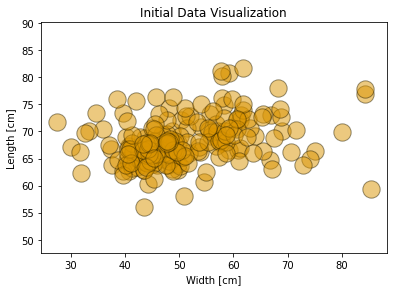

In [13]:
visu.plot_t_shirt_data(clean_data, "Width [cm]", "Length [cm]", True)

## Data Saving

Finally, the clean data will be saved for future use.

In [14]:
clean_data.to_pickle(CLEAN_DATA_FILE)

# Notes

## Back to Question

> **HINT:** *Question is the most important. Please keep it always in mind. At this stage, it is the right moment for repeating it/discussing it / changing it if necessary.*

## Final Timestamp

In [15]:
print("Date and Time of Ending Execution: " + time.strftime("%d/%m/%Y") + " " +time.strftime("%X"))
print("Time duration of whole notebook is: " + str(round((time.time() - global_start_time)/60, 3)) + " seconds")

Date and Time of Ending Execution: 01/01/2022 16:34:56
Time duration of whole notebook is: 0.011 seconds
